STUDENT ID : 11493842

In [392]:
#libraries
import matplotlib.pyplot as plt
import plotly.express as px  #Plotly Express for interactive visualizations
import plotly.graph_objects as go  #Graph Objects for Visualisations
import plotly.figure_factory as ff  #Figure Factory for complex visualizations
import seaborn as sns  #Seaborn for statistical visualization
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier# Random Forest classifier
from sklearn.model_selection import train_test_split# Train-test split for model evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,  # Confusion matrix for classification evaluation
    classification_report,
    f1_score  # F1 score for model evaluation
)
from plotly.subplots import make_subplots  # Multiple plotting
import plotly 
import warnings
warnings.filterwarnings('ignore')

In [391]:
dataset = pd.read_csv("PimaDiabetes.csv") #reading the csv file
# Generating a summary of descriptive statistics for the dataset
dataset.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


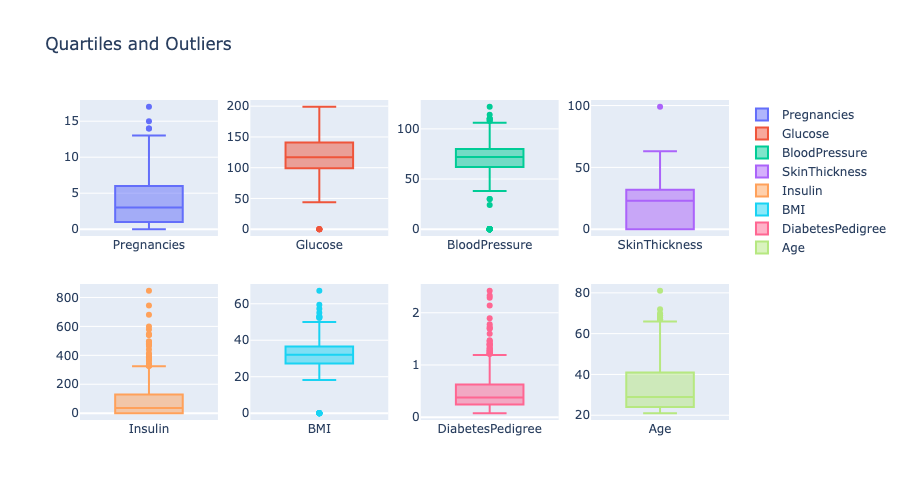

In [393]:
# Convert 'Outcome' column to string type
dataset['Outcome'] = dataset['Outcome'].astype(str)
# Columns for box plots
col = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                   "Insulin", "BMI", "DiabetesPedigree", "Age"]
# Subplot with 2 rows and 4 columns
figure = make_subplots(rows=2, cols=4)
row_no = 1
col_no = 1
#Iteration through each column
for i, column in enumerate(col):
    figure.add_trace(
        go.Box(y=dataset[column], name=column),
        row=row_no, col=col_no
    )
    col_no += 1 #increment
    if col_no > 4:
        col_no = 1
        row_no += 1
#Subplot
figure.update_layout(height=500, width=900, title_text="Quartiles and Outliers")
figure.show()

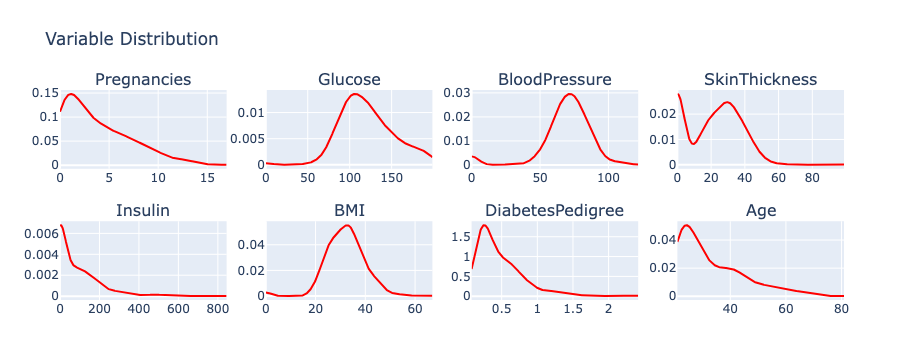

In [394]:
# Columns for the distribution plots
col = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                   "Insulin", "BMI", "DiabetesPedigree", "Age"]
# Creating a subplot with 2 rows and 4 columns
figure = make_subplots(rows=2, cols=4, subplot_titles = col)
# Iteration through each column
for i, column in enumerate(col):
    datahist = [dataset[column].dropna()]
    label = [column]    
    fig = ff.create_distplot(datahist, label, show_hist=False, show_rug=False, curve_type='kde')
    line = fig['data'][0]
    line.update(line=dict(color='red'))
    figure.add_trace(line, row=(i // 4) + 1, col=(i % 4) + 1)
figure.update_layout(title_text='Variable Distribution')
figure.update_layout(margin=dict(t=90, l=60, r=60, b=60))
figure.update_layout(showlegend=False)
figure.show()

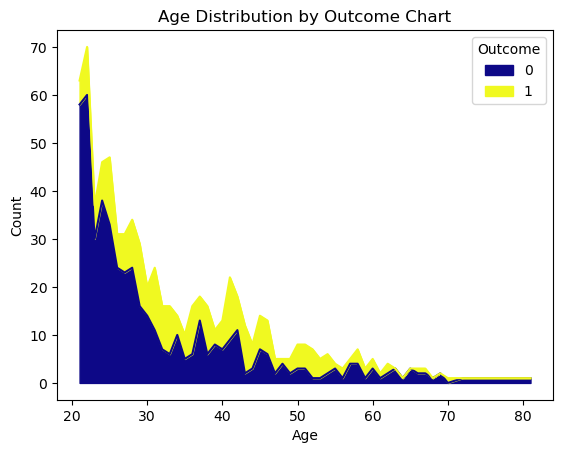

In [395]:
# Grouping the Data
age_dist = df.groupby(['Age', 'Outcome']).size().unstack().fillna(0)
# Creating an area plot
age_dist.plot(kind='area', stacked=True, cmap='plasma')
plt.title('Age Distribution by Outcome Chart')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

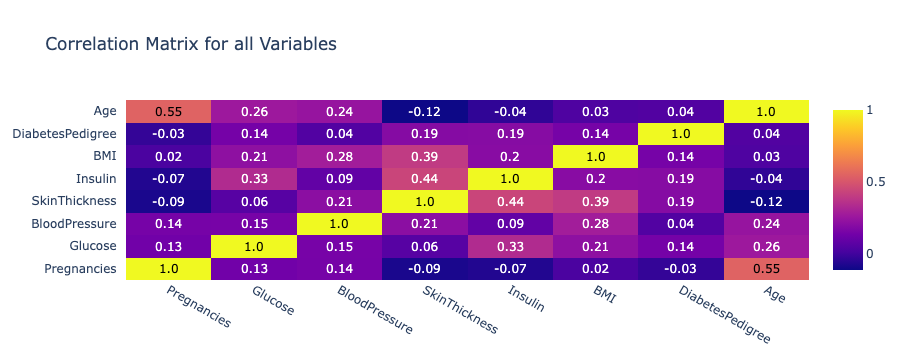

In [397]:
# Calculating the correlation matrix
correlation = dataset.corr()
# Creating the heatmap
figure = ff.create_annotated_heatmap(
    x=list(correlation.columns),
    y=list(correlation.index),
    z=correlation.values,
    annotation_text=correlation.round(2).values,
    showscale=True,
    colorscale='plasma'
)
#Figure
figure.update_xaxes(side="bottom")
figure.update_layout(title_text='Correlation Matrix for all Variables')
figure.show()

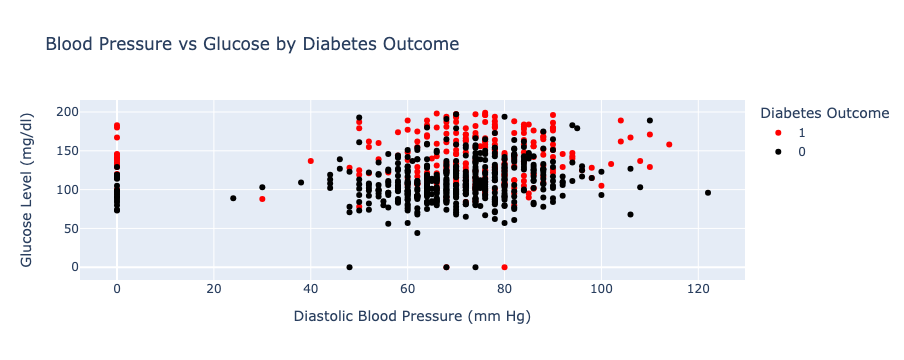

In [414]:
# Creating a scatter plot
figure = px.scatter(dataset, x='BloodPressure', y='Glucose', color='Outcome',
                 labels={
                     "Outcome": "Diabetes Outcome",
                     "BloodPressure": "Diastolic Blood Pressure (mm Hg) ",
                     "Glucose": "Glucose Level (mg/dl) "
                 },
                 title="Blood Pressure vs Glucose by Diabetes Outcome",
                 color_discrete_map={'0': 'black', '1': 'red'})
# Scatter Plot Display
figure.show()

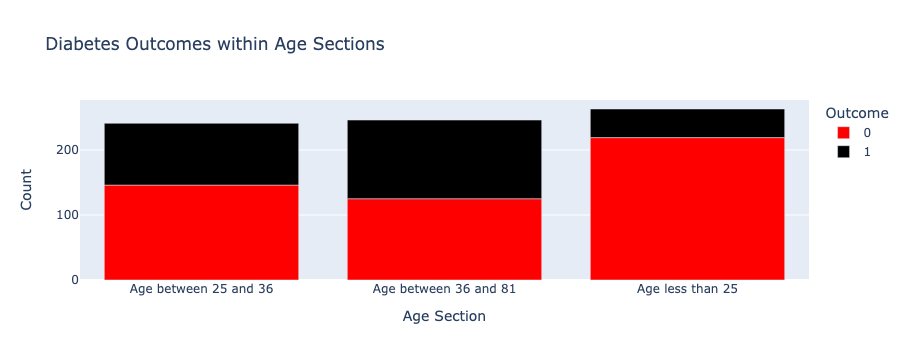

In [431]:
# Defining a function to categorize age into different sections sections
def age_col(age):
    if age <= 25: return 'Age less than 25'
    elif 25 < age <= 36: return 'Age between 25 and 36'
    elif 36< age <= 81: return 'Age between 36 and 81'
# Creating a new age section column
dataset['Age_Section'] = dataset['Age'].apply(age_col)
# Grouping and Calculating counts
age_outcome_counts = dataset.groupby(['Age_Section', 'Outcome']).size().reset_index(name='Count')
# Bar chart creation and Display
figure = px.bar(age_outcome_counts, x='Age_Section', y='Count', color='Outcome',
             title='Diabetes Outcomes within Age Sections',
             labels={"Age_Section": "Age Section"},
             color_discrete_map={'0': 'red', '1': 'black'})
figure.show()

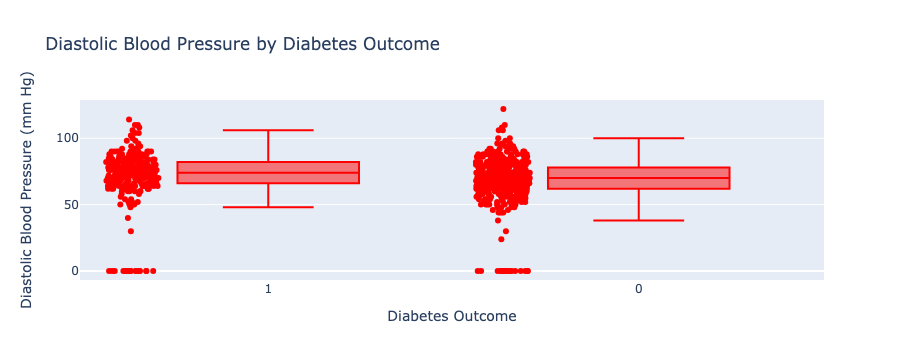

In [404]:
# Creating a box plot
figure = px.box(dataset, x='Outcome', y='BloodPressure', points="all",
                boxmode='overlay', 
                labels={
                    "Outcome": "Diabetes Outcome",
                    "BloodPressure": "Diastolic Blood Pressure (mm Hg)"
                },
                title="Diastolic Blood Pressure by Diabetes Outcome")
figure.update_traces(marker=dict(color='red'), selector=dict(type='box'))
# Display
figure.show()

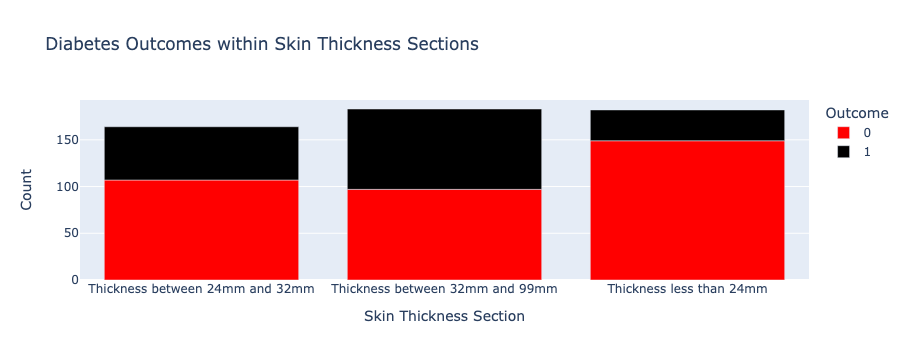

In [430]:
# Defining a function to categorize skin thickness into different sections
def skinthicckness_col(skin):
    if 1 < skin <= 24: return 'Thickness less than 24mm'
    elif 24 < skin <= 32: return 'Thickness between 24mm and 32mm'
    elif 32 < skin <= 99: return 'Thickness between 32mm and 99mm'
# Creating a new age section column
dataset['Skinthickness_Section'] = dataset['SkinThickness'].apply(skinthicckness_col)
# Grouping and Calculating counts
skin_outcome_counts = dataset.groupby(['Skinthickness_Section', 'Outcome']).size().reset_index(name='Count')
# Bar chart creation and Display
figure = px.bar(skin_outcome_counts, x='Skinthickness_Section', y='Count', color='Outcome',
             title='Diabetes Outcomes within Skin Thickness Sections',
             labels={"Skinthickness_Section": "Skin Thickness Section"},
             color_discrete_map={'0': 'red', '1': 'black'})
figure.show()

TASK 3
TASK 3
TASK 3
TASK 3
TASK 3
TASK 3

task 3

In [423]:
# Adding new column "SevenOrMorePregnancies"
dataset["SevenOrMorePregnancies"] = ''
# Looping through each row
for i in range(0, len(dataset)):
    if dataset["Pregnancies"][i] >= 7: #Pregnancies greater than or equal to 7
        dataset["SevenOrMorePregnancies"][i] = 1 # Setting this value to 1
    else:
        dataset["SevenOrMorePregnancies"][i] = 0

# Converting this datatype to integers
dataset["SevenOrMorePregnancies"] = dataset["SevenOrMorePregnancies"].astype(int)
#Relevant columns for this model
def_col = dataset[["SevenOrMorePregnancies", "Outcome"]]

# Input variable and Target Variable
var1 = def_col[['SevenOrMorePregnancies']]
var2 = def_col['Outcome']
# Creating a RandomForestClassifier with 500 trees and 'entropy' as the criterio
rand_for = RandomForestClassifier(n_estimators = 500, criterion = 'entropy')
# Training the model for given variables
rand_for.fit(var1, var2)
# Outputting the training score
print("Random Forest Training Score {}%".format(rand_for.score(var1, var2)*100))


# Filtering out the rows where the values are 0 and resetting the index
sixandfew = var1[var1["SevenOrMorePregnancies"] == 0]
sixandfew.reset_index(inplace = True, drop = True)
# Filtering out the rows where the values are 1 and resetting the index
sevenandmore = var1[var1["SevenOrMorePregnancies"] == 1]
sevenandmore.reset_index(inplace = True, drop = True)


# Summarizing the statistics of the array
def stat_summary(array, head=2, tail=2):
    for i in range(head):
        print(array[i])    
    print("...\n" * (array.ndim - 1), end="")    
    for i in range(-tail, 0, 1):
        print(array[i])

# Displaying the predicted probabilities
print(" ")
print("DIABETES PROBABLITY GIVEN THAT SIX OR FEWER PREGNANCIES [not developing, developing] ")
stat_summary(rand_for.predict_proba(sixandfew))
print(" ")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  ")
print(" ")
print("DIABETES PROBABLITY GIVEN THAT SEVEN OR MORE PREGNANCIES [not developing, developing] ")
stat_summary(rand_for.predict_proba(sevenandmore))

Random Forest Training Score 68.26666666666667%
 
DIABETES PROBABLITY GIVEN THAT SIX OR FEWER PREGNANCIES [not developing, developing] 
[0.71507748 0.28492252]
[0.71507748 0.28492252]
...
[0.71507748 0.28492252]
[0.71507748 0.28492252]
 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
 
DIABETES PROBABLITY GIVEN THAT SEVEN OR MORE PREGNANCIES [not developing, developing] 
[0.43485087 0.56514913]
[0.43485087 0.56514913]
...
[0.43485087 0.56514913]
[0.43485087 0.56514913]


TASK 4

TASK 4

TASK 4

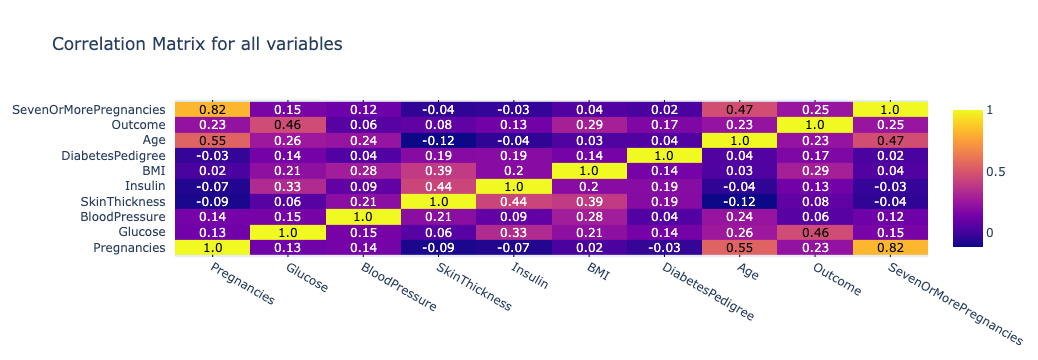

In [450]:
# Reading data from the two csv files, given and to_predict
defcol = pd.read_csv("PimaDiabetes.csv")
topredict = pd.read_csv("ToPredict.csv")

# Addition of the column seven or more pregnancies to the dataset
defcol["SevenOrMorePregnancies"] = ''
# Looping through each row
for i in range(0, len(defcol)):
    if defcol["Pregnancies"][i] >= 7: # Pregnancies greater than or equal to 7
        defcol["SevenOrMorePregnancies"][i] = 1 # Setting the value to 1
    else:
        defcol["SevenOrMorePregnancies"][i] = 0

# Converting the datatype to integers
defcol["SevenOrMorePregnancies"] = defcol["SevenOrMorePregnancies"].astype(int)

correlation = defcol.corr() # Correlation matrix
# Creation of the heatmap
figure = ff.create_annotated_heatmap(
    x=list(correlation.columns),
    y=list(correlation.index),
    z=correlation.values,
    annotation_text=correlation.round(2).values,
    showscale=True,
    colorscale='Plasma'
)
# Displaying the Figure
figure.update_layout(title_text='Correlation Matrix for all variables')
figure.update_xaxes(side="bottom")
figure.show()

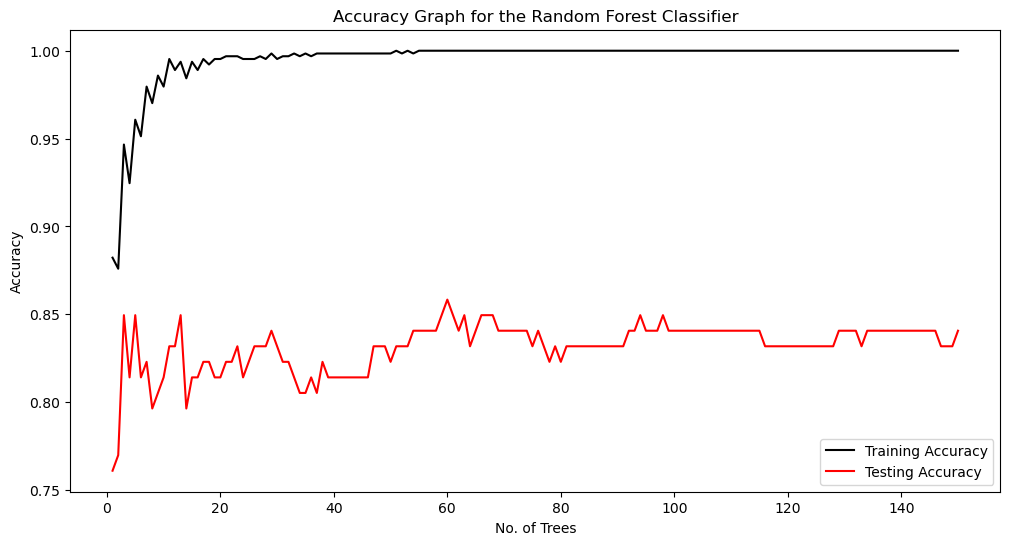

In [451]:
#Choosing Independent variables for training and testing
x = defcol[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "Age", "SevenOrMorePregnancies"]]
y = defcol["Outcome"] # Selection of the target variable

#Training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=0)

# RandomForestClassifier with 150 trees. Random seed setting
rand_for = RandomForestClassifier(n_estimators=150, random_state=50)

training_accu = [] # Store training and testing accuracies
testing_accu = []

treelist = range(1, rand_for.n_estimators + 1) # Generating a list of tree numbers

# Looping through different number of trees. Evaluation of the model.
for n_trees in treelist:
    rand_for.set_params(n_estimators=n_trees) # Number of trees
    rand_for.fit(xtrain, ytrain) # training
    
    training_pred = rand_for.predict(xtrain) # Outcome prediction
    testing_pred = rand_for.predict(xtest)
    
    training_accu.append(accuracy_score(ytrain, training_pred)) # Calculating and storing accuracy
    testing_accu.append(accuracy_score(ytest, testing_pred))

# Plotting the two accuracies over the number of trees
plt.figure(figsize=(12, 6))
plt.plot(treelist, training_accu, label='Training Accuracy', color='black')
plt.plot(treelist, testing_accu, label='Testing Accuracy', color='red')

# Creating and Displaying the plot
plt.title('Accuracy Graph for the Random Forest Classifier')
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [452]:
# Predicting outcomes using the trained RF Classifier
ypredicted = rand_for.predict(xtest)

# Training Score, Accuracy Score 
print("Random Forest Traing Score: {}%".format(rand_for.score(xtrain, ytrain)*100))
print("Random Forest Accuracy Score: {}%".format(accuracy_score(ytest, ypredicted)*100))
print('\n')
# Classification report of the RF classifier on the test set
print(classification_report(ytest, ypredicted))

Random Forest Traing Score: 100.0%
Random Forest Accuracy Score: 84.070796460177%


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.78      0.78      0.78        40

    accuracy                           0.84       113
   macro avg       0.83      0.83      0.83       113
weighted avg       0.84      0.84      0.84       113



In [453]:
# Adding column sevenormorepregnancies to the To_Predict dataset
topredict["SevenOrMorePregnancies"] = ''
# Looping through the dataset
for i in range(0, len(topredict)):
    if topredict["Pregnancies"][i] >= 7: # For number of pregnancies greater than or equal to 7
        topredict["SevenOrMorePregnancies"][i] = 1 # Setting the value to 1
    else:
        topredict["SevenOrMorePregnancies"][i] = 0

#Converting the datatype to integers
topredict["SevenOrMorePregnancies"] = topredict["SevenOrMorePregnancies"].astype(int)
# Addition of the PredictedOutcome column to the dataset
# Prediction of the outcome using the trained RF model
topredict["Predicted Outcome"] = rand_for.predict(topredict)
topredict # Display

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,SevenOrMorePregnancies,Predicted Outcome
0,4,136,70,0,0,31.2,1.182,22,0,1
1,1,121,78,39,74,39.0,0.261,28,0,0
2,3,108,62,24,0,26.0,0.223,25,0,0
3,0,181,88,44,510,43.3,0.222,26,0,1
4,8,154,78,32,0,32.4,0.443,45,1,1
